In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append('../../..')
from meep_metamaterials import metamaterials as mm
from meep_metamaterials.retrieval import retrieval

Using MPI version 4.0, 1 processes


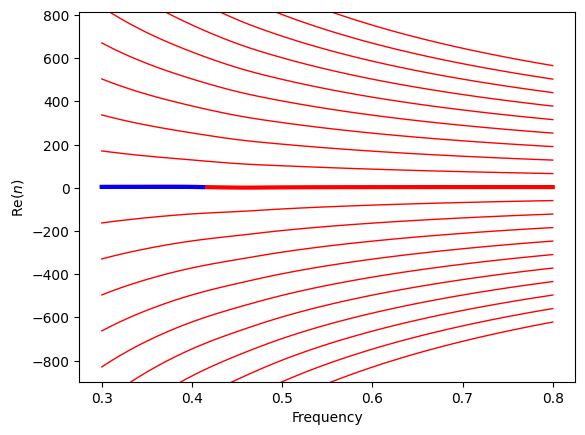

In [21]:
freqs = np.linspace(0.3, 0.8, 50)
wvl = 1/freqs
s11 = np.loadtxt('s11_NL.txt', dtype=np.complex128)
s21 = np.loadtxt('s21_NL.txt', dtype=np.complex128)
params = retrieval.eff_parameters(freqs, 0.02, s11, s21, plot_branches=True, branch=0)

# Normal split-ring resonators
s11n = np.loadtxt('../../srr/tmp/E/s11.txt', dtype=np.complex128)
s21n = np.loadtxt('../../srr/tmp/E/s21.txt', dtype=np.complex128)
paramsn = retrieval.eff_parameters(np.linspace(0.3, 0.7, 50), 0.02, s11n, s21n)

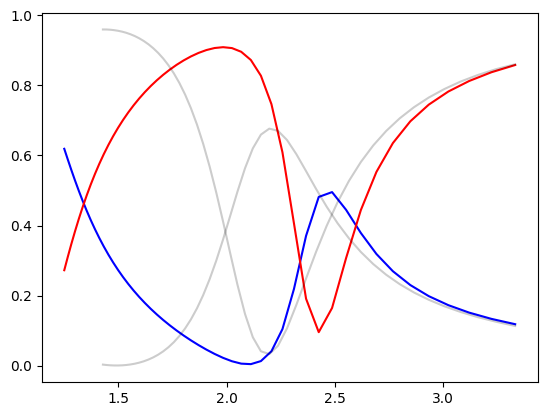

In [22]:
plt.plot(1/freqs, np.abs(s11)**2, 'b', label='S11')
plt.plot(1/freqs, np.abs(s21)**2, 'r', label='S21')

plt.plot(1/np.linspace(0.3, 0.7, 50), np.abs(s11n)**2, 'k', alpha=.2, label='S11')
plt.plot(1/np.linspace(0.3, 0.7, 50), np.abs(s21n)**2, 'k', alpha=.2, label='S21')

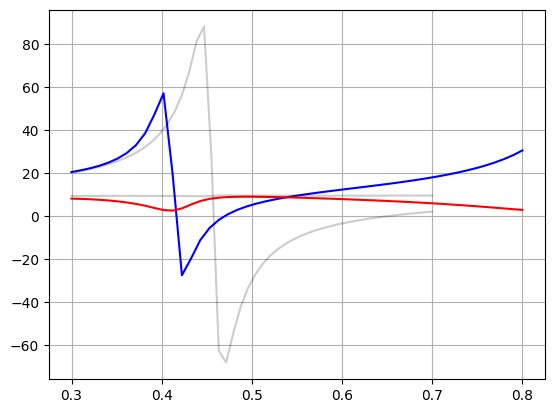

In [26]:
plt.plot(freqs, np.real(params['eps']), 'b', label='eps')
plt.plot(freqs, 10*np.real(params['mu']), 'r', label='mu')

plt.plot(np.linspace(0.3, 0.7, 50), np.real(paramsn['eps']), 'k', alpha=.2, label='eps')
plt.plot(np.linspace(0.3, 0.7, 50), 10*np.real(paramsn['mu']), 'k', alpha=.2, label='mu')
plt.grid()